# ASSIGNMENT 3
- Nama          : Lisa Wahyu Ningsih
- Kode peserta  : PYTN-KS15-007
- Kelas		    : KS-015
- Program	    : Python for Data Science

# Bank 3 (Menggunakan data bank-full)

# Classification 

- Logistic Regression
- K-Nearest Neighbors
- Support Vector Machine
- Decision Tree
- Random Forest
- Naive Bayes
- Confusion Matrix 
- Visualization 



## Preprocessing Data
- Import Pustaka
- Data Loading
- Data Cleaning
- EDA (Exploration Data Analysis)

### Import Pustaka

In [61]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats as stats

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay, accuracy_score
from sklearn.datasets import load_digits, load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from IPython.display import Math, Latex
from IPython.core.display import Image
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize' : (7,7)})
import statsmodels.api as sm

import random
import warnings 
warnings.filterwarnings("ignore")

plt.style.use('ggplot')
%matplotlib inline

### Data Loading 

In [62]:
df=pd.read_csv('bank_full.csv', sep=';')
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [63]:
print(df.shape)

(45211, 17)


In [64]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [67]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [68]:
df["y"].dtype

dtype('O')

In [69]:
df['y_num']=df["y"].replace({"no":0, "yes":1})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [70]:
df["y_num"].dtype

dtype('int64')

untuk menampilkan kolom

In [71]:
df_=df.head(10)
df_.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y', 'y_num'],
      dtype=object)

untuk memeriksa apakah ada kolom yang memiliki nilai null

In [72]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
y_num        0
dtype: int64

berdasarkan hasil output diatas menunjukkan bahwa tidak ada missing value pada data

In [73]:
print(df.isnull().any())

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
y_num        False
dtype: bool


## Data Cleaning

Tidak perlu melakukan data cleaning karena tidak terdapat missing value

## Exploration Data Analysis (EDA)

In [74]:
print(df.groupby)

<bound method DataFrame.groupby of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact

In [75]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,y_num
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [76]:
df.min()

age                18
job            admin.
marital      divorced
education     primary
default            no
balance         -8019
housing            no
loan               no
contact      cellular
day                 1
month             apr
duration            0
campaign            1
pdays              -1
previous            0
poutcome      failure
y                  no
y_num               0
dtype: object

In [77]:
df.max()

age               95
job          unknown
marital       single
education    unknown
default          yes
balance       102127
housing          yes
loan             yes
contact      unknown
day               31
month            sep
duration        4918
campaign          63
pdays            871
previous         275
poutcome     unknown
y                yes
y_num              1
dtype: object

In [78]:
cats=[i for i in df.columns if df[i].dtypes == 'object']
nums=[i for i in df.columns if df[i].dtypes != 'object']

## Logistic Regression

In [79]:
x = df.drop(['y'], axis=1)
y = df['y']

In [80]:
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [81]:
y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [82]:
df_x = pd.get_dummies(x)
df_x.head()

,age,balance,day,duration,campaign,pdays,previous,y_num,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [83]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y_num                45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

In [84]:
X_train,X_test,y_train,y_test = train_test_split(df_x,y,test_size = 0.25,random_state = 123)

In [85]:
log_model =LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)
y_predict = log_model.predict(X_test)

In [86]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     10003
         yes       1.00      1.00      1.00      1300

    accuracy                           1.00     11303
   macro avg       1.00      1.00      1.00     11303
weighted avg       1.00      1.00      1.00     11303



In [87]:
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 1.0


## KNN (K-Nearest Neighbors)

In [88]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
y_pred_2 = model_knn.predict(X_test)

In [89]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

          no       0.91      0.96      0.93     10003
         yes       0.47      0.27      0.34      1300

    accuracy                           0.88     11303
   macro avg       0.69      0.62      0.64     11303
weighted avg       0.86      0.88      0.87     11303



In [90]:
print("Accuracy:", accuracy_score(y_test, y_pred_2))

Accuracy: 0.8803857382995665


## SVM (Support Vector Machine)

In [91]:
model_svm = SVC()
model_svm.fit(X_train, y_train)
y_predict_3 = model_svm.predict(X_test)

In [92]:
print(classification_report(y_test, y_predict_3))

              precision    recall  f1-score   support

          no       0.89      1.00      0.94     10003
         yes       0.54      0.01      0.01      1300

    accuracy                           0.89     11303
   macro avg       0.71      0.50      0.47     11303
weighted avg       0.85      0.89      0.83     11303



In [93]:
print("Accuracy:", accuracy_score(y_test, y_predict_3))

Accuracy: 0.8850747589135628


## Decission tree

In [94]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
y_predict_4 = model_dt.predict(X_test)

In [95]:
print(classification_report(y_test, y_predict_4))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     10003
         yes       1.00      1.00      1.00      1300

    accuracy                           1.00     11303
   macro avg       1.00      1.00      1.00     11303
weighted avg       1.00      1.00      1.00     11303



In [96]:
print("Accuracy:", accuracy_score(y_test, y_predict_4))

Accuracy: 1.0


## Random Forest

In [97]:
model_rfc = RandomForestClassifier()
model_rfc.fit(X_train, y_train)
y_predict_5 = model_rfc.predict(X_test)

In [98]:
print(classification_report(y_test, y_predict_5))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     10003
         yes       1.00      1.00      1.00      1300

    accuracy                           1.00     11303
   macro avg       1.00      1.00      1.00     11303
weighted avg       1.00      1.00      1.00     11303



In [99]:
print("Accuracy:", accuracy_score(y_test, y_predict_5))

Accuracy: 1.0


## Naive Bayes

In [100]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_predict_6 = model_nb.predict(X_test)

In [101]:
print(classification_report(y_test, y_predict_6))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00     10003
         yes       1.00      1.00      1.00      1300

    accuracy                           1.00     11303
   macro avg       1.00      1.00      1.00     11303
weighted avg       1.00      1.00      1.00     11303



In [102]:
print("Accuracy:", accuracy_score(y_test, y_predict_6))

Accuracy: 0.9994691674776608


Berdasarkan output diatas, kita akan mengambil model logistik regresi yang akan digunakan untuk Confussion Matrix:

In [103]:
y_score = log_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=log_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=log_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

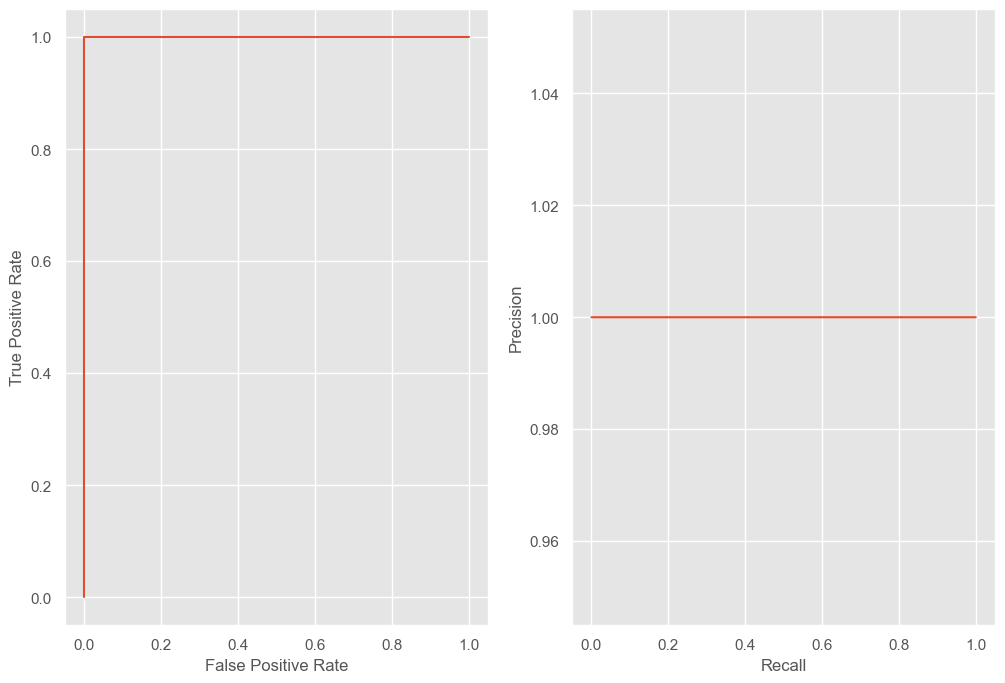

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

## Visualization

#### Confussion Matrix

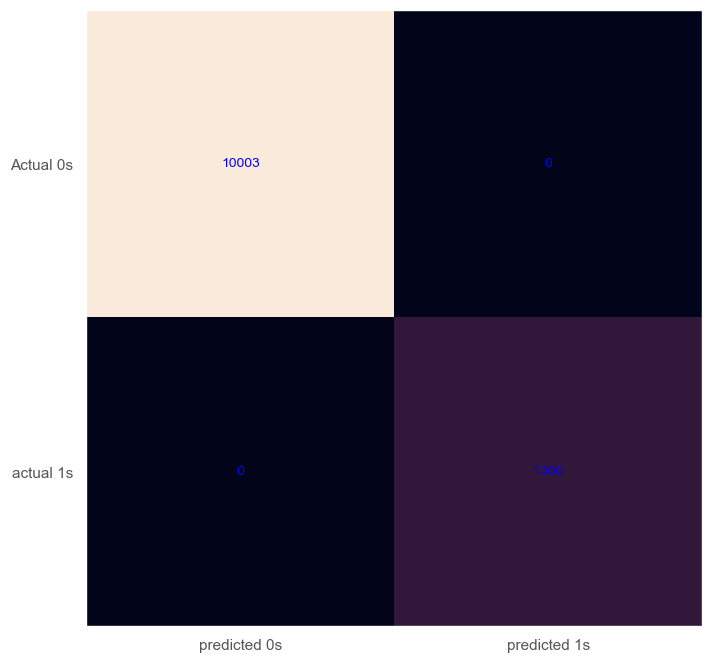

In [105]:
cm = confusion_matrix(y_test, y_predict)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predicted 0s', 'predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range (2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='blue')
plt.show()

Setelah dilakukan Confusion Matrix, didapat : 
- True Negatives 10003
- False Negatives 0
- False Positives 0
- True Positives 1300

#### pairplot

In [106]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [107]:
df_final = df[df['job'] != 'unknown']
df_final

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no,0


In [108]:
df_final.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,0


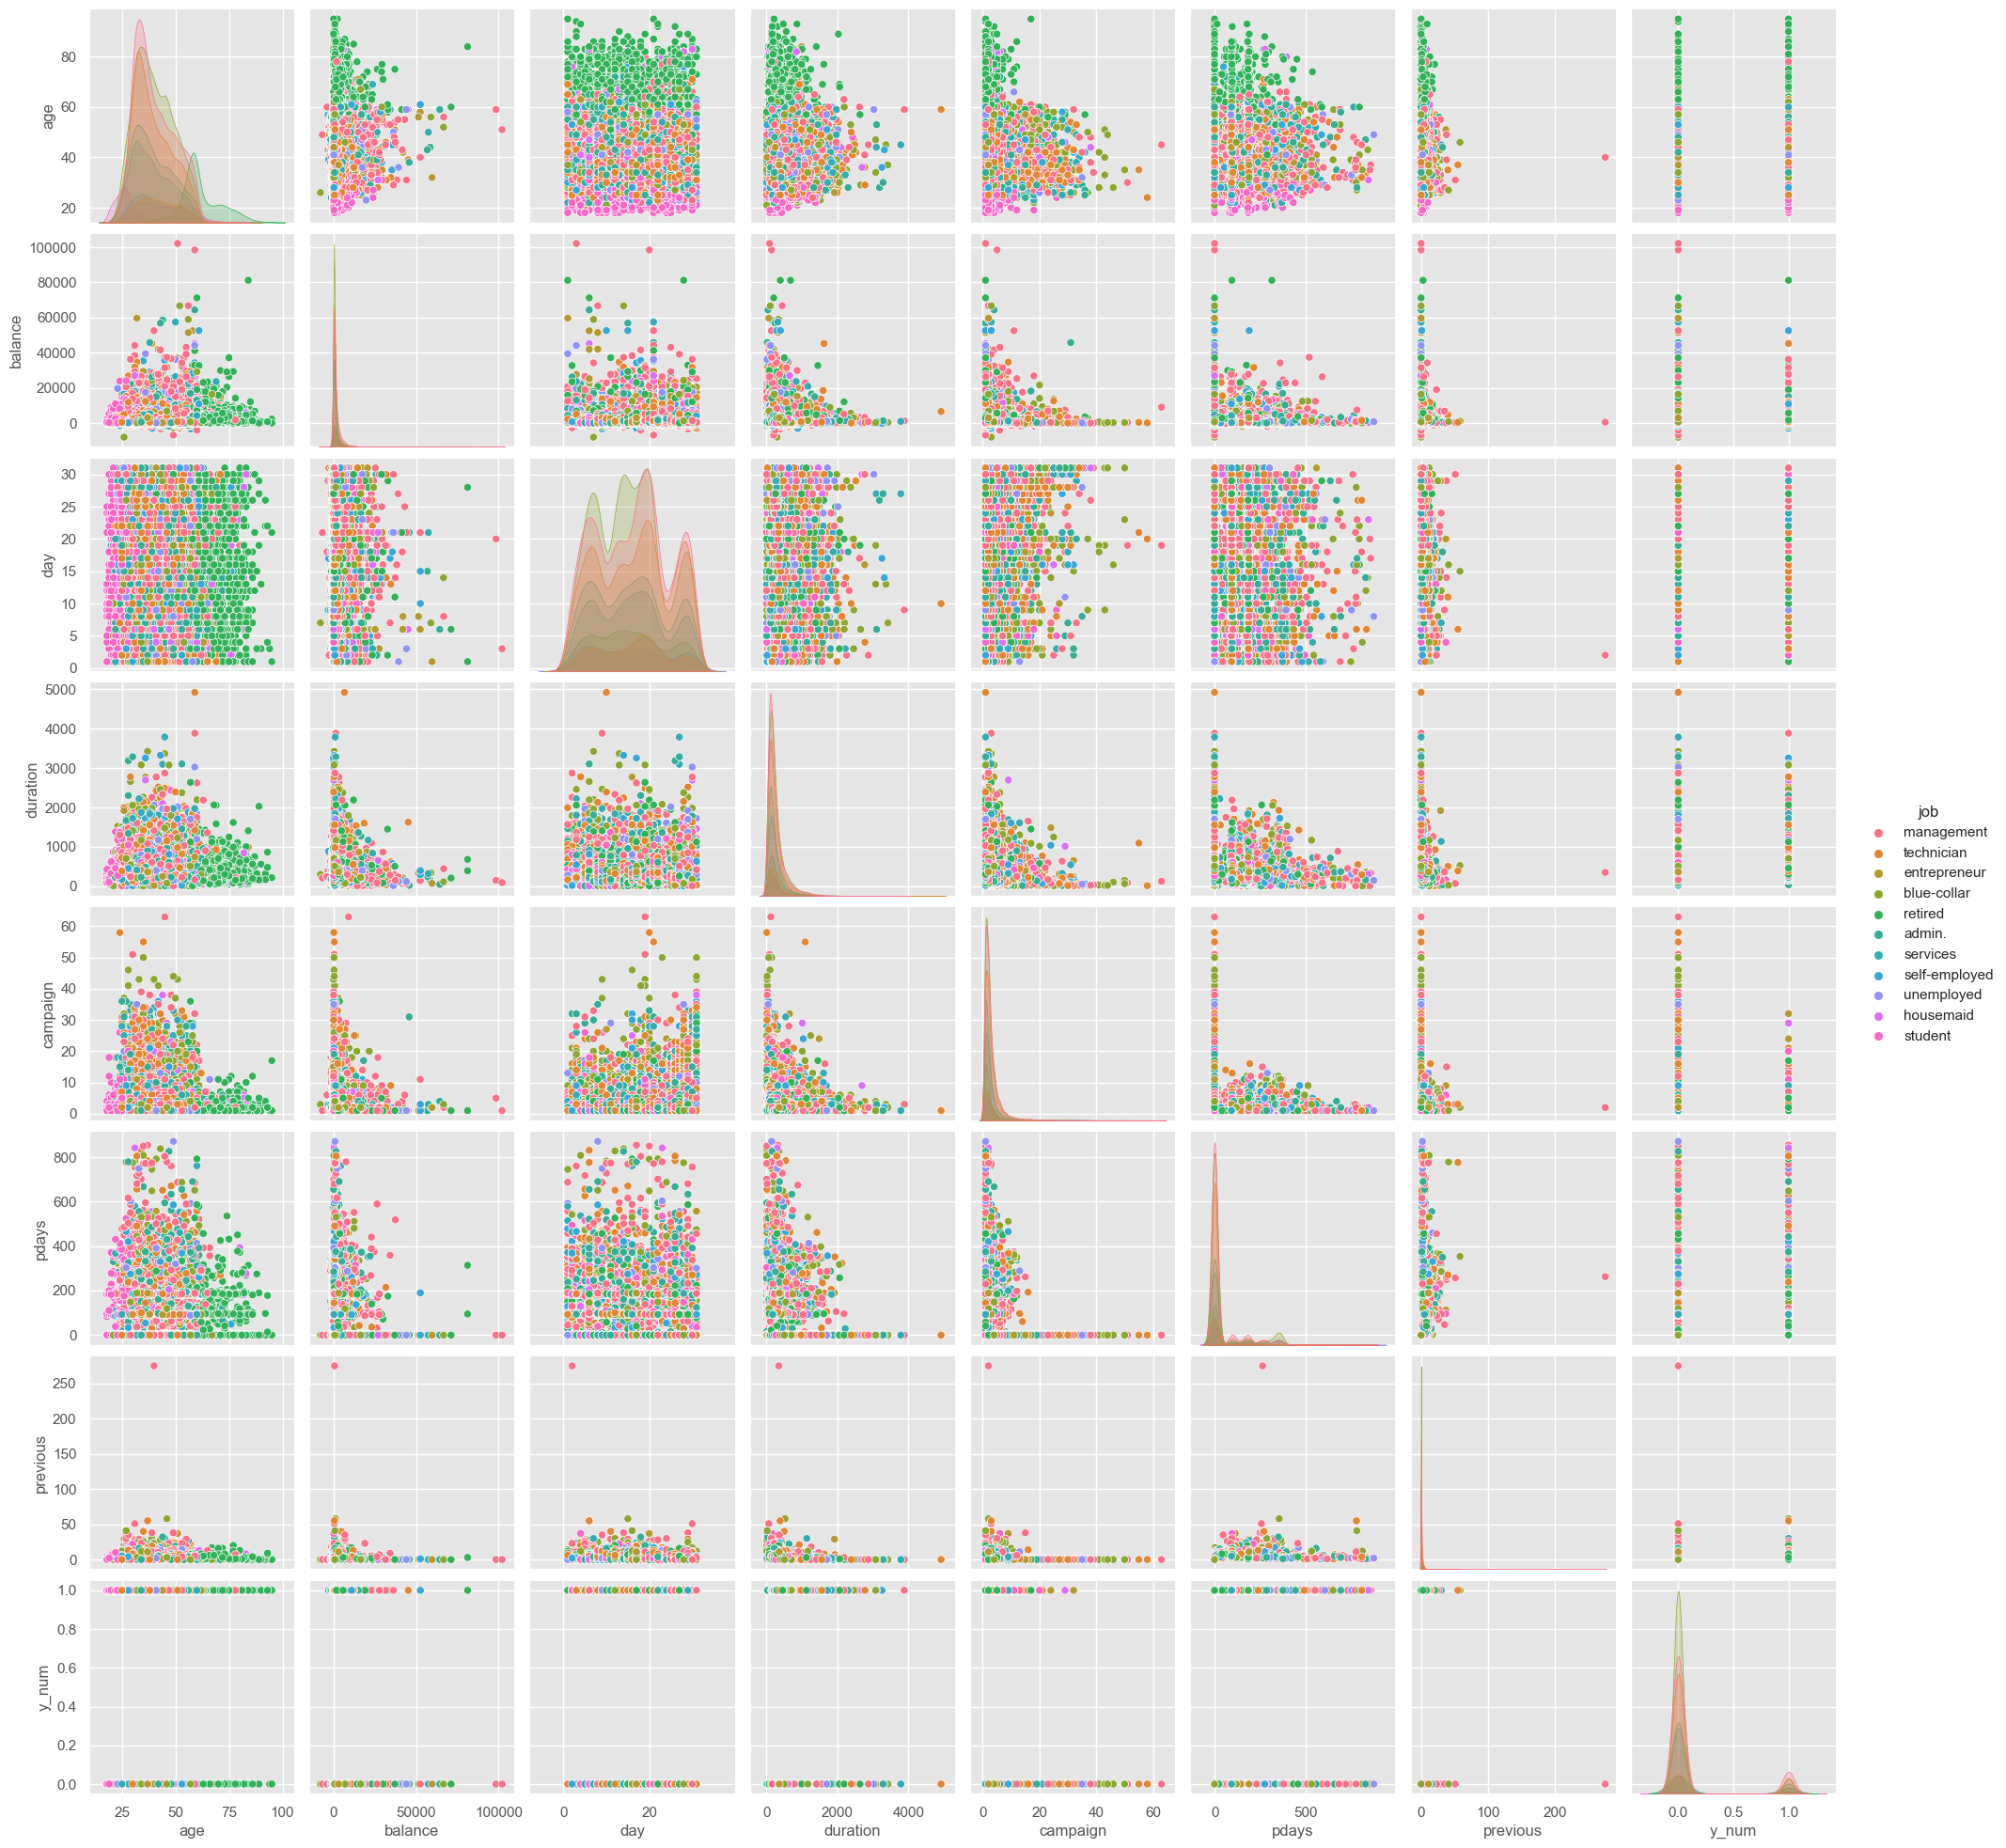

In [109]:
sns.pairplot(df_final, hue='job', size=2.5)

#### Histogram

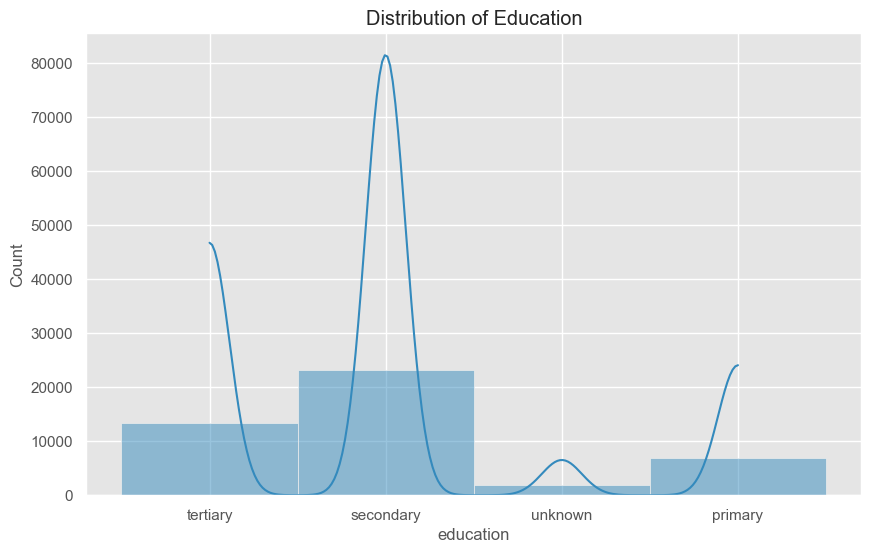

In [110]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="education", kde=True)
plt.title("Distribution of Education")
plt.show()

##### Interpretasi Output Histogram:
Berdasarkan output diatas, dapat dilihat bahwa orang dengan tingkat pendidikan SD memiliki frekuensi tertinggi yang berlangganan deposito diantara kelompok orang berpendidikan lainnya

#### Scatter Plot

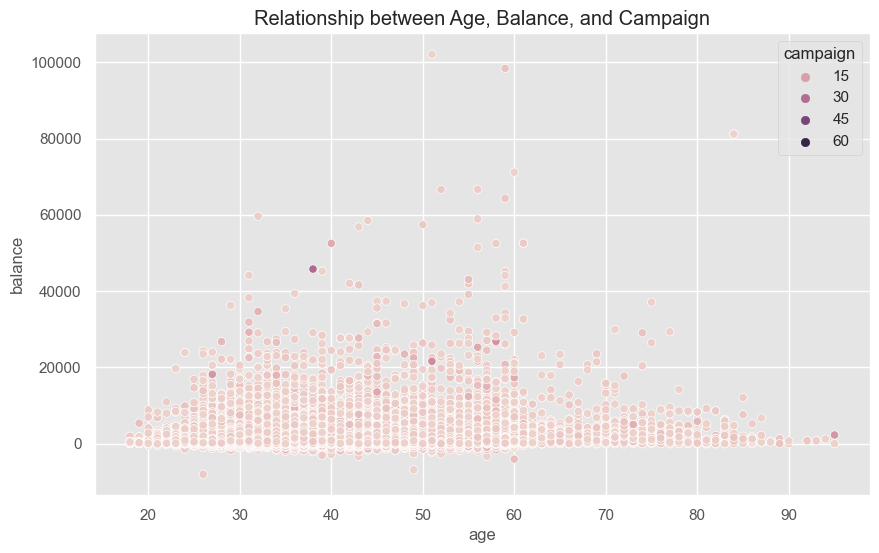

In [111]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="balance", hue="campaign")
plt.title("Relationship between Age, Balance, and Campaign")
plt.show()

##### Interpretasi Output Scatter Plot:
Berdasarkan output diatas, dapat dilihat bahwa plot menyebar yang artinya relationship between age, balance, and campaign memiliki hubungan atau korelasi yang sangat rendah atau bahkan tidak ada hubungan

#### Pie Chart

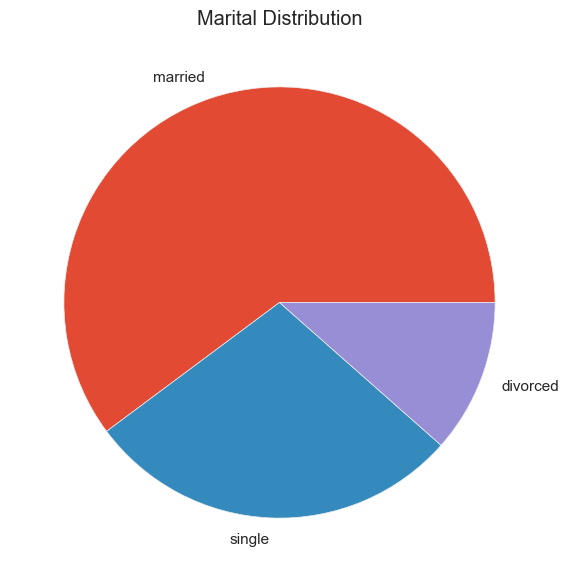

In [112]:
married_ = df['marital'].value_counts()
plt.pie(married_, labels=married_.index)
plt.title('Marital Distribution')
plt.show()

##### Interpretasi Output Pie Chart:
Berdasarkan output diatas, dapat dilihat bahwa angka status pernikahan terbanyak yang berlangganan deposito adalah menikah, disusul dengan status single, dan cerai.

#### Heatmap

<AxesSubplot:>

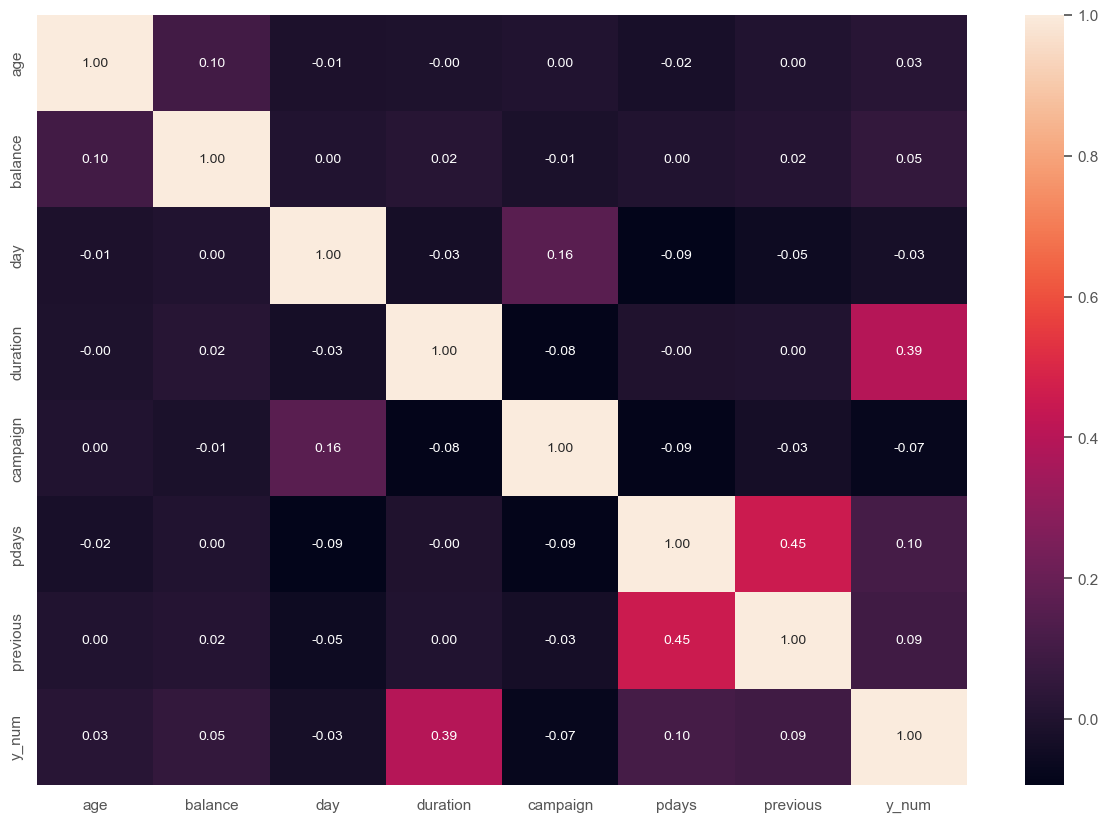

In [113]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

##### Interpretasi Output Heatmap:

Berdasarkan output diatas, sebagian data memiliki korelasi yang sangat lemah (<0.2). tingkat korelasi juga bisa dilihat dari warna yang tertera, semakin terang warnanya maka semakin kuat korelasinya.